## State Farm Interview Exercise

I was given this unlabeled dataset as an exercise as part of the interview for State Farm in January 2019. The goal is to produce 2 different classifier models and a writeup comparing the 2 models.

## Writeup

Below, I examine the data, clean it up, do some one-hot encoding, and build two final models to present: an XGBoost Classifier and a Convolutional Neural Network. I'll discuss the trade-offs of each below.

XGBoost

XGBoost is very popular these days. I only got into it because my classmates kept raving about it. The pros are that it's generally very accurate compared to other models, and relatively easy to implement. It's also very robust in areas where others are not, statistically speaking: it's more robust against heteroskedasticity than linear models, good with multicollinearity, and doesn't require normally distributed variables. It's main weakness is the time. Time to process is one, as you can see that running my model was a 30+ minute exercise each time. Second, hyperparameter tuning is very important, but takes forever. Rather than run each attempt at 30 minutes, I previously tried to do it all at once with a GridSearchCV model, and reused some of that code, but the time it takes to get a final result for the best hyperparameters is more time than I was even given for this exercise. It's on the order of several days for my laptop, and I seriously considered hiring an AWS instance for this. Still, people really like it, and it did much better than the Logistic Regression and Random Forest baselines.

CNN

Convolutional Neural Networks and deep learning are very interesting to me. It's a new and exciting area of data science, and people keep doing great new stuff with it. I'll admit, it's a lot of trial and error to get a good model, but I've previously spent a lot of time on that trial and error. Its weakness is that you really have to spend that time on learning how it works, and understanding the right layers and initializers, etc. There's a lot of things to tweak. However, once you have it done, it can be very efficient. This time it finished in mere minutes, much shorter than my other model. Also, it got a better accuracy than XGBoost, which is everyone's favorite. I think that's a solid win for both the model and me.

## EDA

In this section, I'll explore the data and prepare it for modeling.

In [102]:
import pandas as pd

#load the data set
df = pd.read_csv("/Users/Ryan/Desktop/Programming/State Farm/exercise_02_train.csv")

#check data types
pd.set_option('display.max_rows', None)
#df.dtypes

In [103]:
#look at standard metrics for each feature
#since theres 101 variables i need more columns displayed
pd.set_option('expand_frame_repr', True)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

x0            x1            x2            x3            x4  \
count   39989.000000  39990.000000  39992.000000  39991.000000  39992.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    3.446069     -7.788884      1.706058     -0.072972      0.123077       
std     16.247547     37.014862     38.385085     1.503243      16.289994      
min    -60.113902    -157.341119   -163.339956   -6.276969     -61.632319      
25%    -7.602474     -32.740989    -24.141605    -1.088182     -10.896241      
50%     3.448865     -8.019993      1.963977     -0.062389      0.104277       
75%     14.266716     16.853383     27.516500     0.940612      11.078565      
max     75.311659     153.469221    154.051060    5.837559      65.949709      

                  x5            x6            x7            x8            x9  \
count   39994.000000  39990.000000  39991.000000  39994.000000  39993.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean   -0.608624      0.035576     -0.052651     -2.909764     -0.024265       
std     15.585122     9.041371      6.953403      13.149006     2.939895       
min    -62.808995    -35.060656    -26.736717    -53.735586    -11.497395      
25%    -11.183089    -6.090255     -4.747798     -11.722776    -2.004215       
50%    -0.574567      0.046812     -0.037727     -2.941234     -0.054526       
75%     9.955357      6.100903      4.637982      5.865014      1.955100       
max     63.424046     45.053946     34.267792     66.936936     11.271939      

                 x10           x11           x12           x13           x14  \
count   39991.000000  39993.000000  39989.000000  39986.000000  39997.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    7.549425      0.019432     -4.462099     -0.004919      0.003959       
std     40.664588     4.448199      17.951827     2.540264      3.103144       
min    -170.569286   -17.846688    -78.365573    -10.825818    -12.752781      
25%    -19.680608    -2.959371     -16.505697    -1.717602     -2.090743       
50%     7.754040      0.007506     -4.456607     -0.011002      0.000420       
75%     34.980874     3.003331      7.589847      1.723181      2.088211       
max     174.684978    17.034473     70.296750     10.467570     12.778386      

                 x15           x16           x17           x18           x19  \
count   39996.000000  39993.000000  39988.000000  39986.000000  39992.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    0.012312     -0.036433     -0.029770      6.691661      0.089983       
std     8.675020      4.061350      6.574531      27.595549     20.928682      
min    -35.468910    -17.734781    -25.737710    -103.958784   -84.212286      
25%    -5.836289     -2.763969     -4.461645     -11.797925    -14.162307      
50%     0.057912     -0.025010     -0.024473      6.820274     -0.086375       
75%     5.836647      2.713759      4.431893      25.268253     14.227401      
max     42.615707     14.828773     25.375968     107.938354    82.896965      

                 x20           x21           x22           x23           x24  \
count   39995.000000  39987.000000  39994.000000  39992.000000  39986.000000   
unique NaN    

There's a different count for each of the columns, indicating missing data. y has 40000. The lowest count is 39986. That's a small amount of missing data in each column, relative to the total. So first I'll just drop them all and see how that impacts the statistics.

In [104]:
df2 = df.dropna()
df2.describe(include = 'all')

x0            x1            x2            x3            x4  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    3.449241     -7.804870      1.713236     -0.073733      0.133611       
std     16.239205     37.011629     38.387685     1.504220      16.286201      
min    -60.113902    -157.341119   -163.339956   -6.276969     -61.632319      
25%    -7.593210     -32.716512    -24.156128    -1.088384     -10.888105      
50%     3.458413     -8.026095      1.959583     -0.062894      0.138015       
75%     14.267872     16.793057     27.517244     0.940109      11.095779      
max     75.311659     153.469221    154.051060    5.837559      65.949709      

                  x5            x6            x7            x8            x9  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean   -0.614352      0.040018     -0.053879     -2.913257     -0.022921       
std     15.586373     9.045815      6.948283      13.142383     2.939357       
min    -62.808995    -35.060656    -26.736717    -53.735586    -11.497395      
25%    -11.199135    -6.084171     -4.745854     -11.722776    -2.002027       
50%    -0.575871      0.043832     -0.043912     -2.960221     -0.053051       
75%     9.962899      6.101419      4.635347      5.844992      1.959467       
max     63.424046     45.053946     34.267792     66.936936     11.271939      

                 x10           x11           x12           x13           x14  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    7.513600      0.015481     -4.438875     -0.006280      0.003751       
std     40.627841     4.450573      17.958650     2.541841      3.103318       
min    -170.569286   -17.846688    -78.365573    -10.825818    -12.752781      
25%    -19.735916    -2.965668     -16.498399    -1.721057     -2.093613       
50%     7.755237      0.003747     -4.419362     -0.012822     -0.000164       
75%     34.924765     3.003306      7.623373      1.723660      2.087760       
max     174.684978    17.034473     70.296750     10.467570     12.778386      

                 x15           x16           x17           x18           x19  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    0.012907     -0.031995     -0.025231      6.695532      0.087572       
std     8.666260      4.058501      6.578023      27.594306     20.939328      
min    -35.468910    -17.734781    -25.737710    -103.958784   -84.212286      
25%    -5.831324     -2.758428     -4.459172     -11.793683    -14.165626      
50%     0.048764     -0.021549     -0.023944      6.822878     -0.094860       
75%     5.833835      2.714074      4.438017      25.250262     14.247656      
max     42.615707     14.828773     25.375968     107.938354    82.896965      

                 x20           x21           x22           x23           x24  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN    

Simply dropping the missing variables reduces the count to 39182, a loss of around 818 rows, depending on the column. This is only about a 2% change. This doesn't seem significant, and a quick glance at the stats above shows that it didn't have much impact for most variables, so I'm going to go ahead and see how this performs. If I can't get a great result, I'll come back and consider imputing the variables somehow and see how this affects the result.

I also see that there are non-numeric variables included. These are x34, x35, x41, x45, x68, and x93. I will now determine how to deal with these.


In [105]:
#x41 is dollar signs on numbers, i'll strip the $ out and then it'll be number
#strip $, convert to float
df2.loc[:,'x41'] = df2.loc[:,'x41'].str.replace('$','').astype(float)
#print(df2['x41'])

/Users/Ryan/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [106]:
#x34, x35, x45, x68, x93 left
#x45 is percentages, that's easy to fix
#i'll just strip the percent sign and and divide by 100

df2.loc[:,'x45'] = df2.loc[:,'x45'].str.rstrip('%').astype(float) / 100.0
#print(df2['x45'])

/Users/Ryan/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [107]:
#x34, x35, x68, x93 left
#i'll do x34 now

df2.x34.unique()

array(['Toyota', 'Honda', 'bmw', 'volkswagon', 'tesla', 'nissan',
       'chrystler', 'ford', 'mercades', 'chevrolet'], dtype=object)

In [108]:
#since these are unique and theres no errors, i'll one-hot encode them
#i don't care that some are spelled wrong, as long as there's no duplicates or duplication errors
#ill do the one hot encoding as one step later so it's cleaner and i'm nto adding to the dataframe as i'm evaluating it
#so let's move on to the next variable x35
 
df2.x35.unique()

array(['wed', 'thurday', 'wednesday', 'thur', 'tuesday', 'monday',
       'friday', 'fri'], dtype=object)

In [109]:
#so there's duplicates in this one: both wed and wednesday, thur and thursday, and fri and friday
#these need to be fixed
#since monday and tuesday are long form, i'll make the rest match them
#i'll fix thursday here since it's no extra time, but the chance the date matters in the model is low

df2.x35.replace(['wed','thur','fri','thurday'],['wednesday','thursday','friday','thursday'], inplace=True)

/Users/Ryan/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [110]:
#check it to make sure it worked

df2.x35.unique()

array(['wednesday', 'thursday', 'tuesday', 'monday', 'friday'],
      dtype=object)

In [111]:
#need to one hot encode these as well, leaving x68 and x93
#so thats done, lets move on to the next variable x68

df2.x68.unique()

array(['Jun', 'sept.', 'Oct', 'July', 'Aug', 'Apr', 'May', 'Mar', 'Nov',
       'Feb', 'Dev', 'January'], dtype=object)

In [112]:
#im not going to bother fixing these, it won't improve the model, so they need to be one hot encoded as well
#next is x93

df2.x93.unique()

array(['asia', 'america', 'euorpe'], dtype=object)

With x93 complete, all of the categorical data is accounted for and cleaned up appropriately. Now, I can one-hot encode them to make use of them in the models. 

There's a lot of spelling errors/typos in the data I'm not fixing and I made brief comments in the code about, but I feel I should explain my thinking more clearly here. Fixing these variables will take time, and I don't think this is value added in this case. No human is going to see the values, just the computer model. In another situation where it matters, I could change it.

In [113]:
#that said, time to one hot encode x34, x35, x68, x93
#x41 and x45 were solved, but reminder to self to check the type as float when i do describe in this step
X = df2[['x34','x35','x68','x93']]

#make the variables categorical
X['x34'] = pd.Categorical(X['x34'])
X['x35'] = pd.Categorical(X['x35'])
X['x68'] = pd.Categorical(X['x68'])
X['x93'] = pd.Categorical(X['x93'])

#one hot encode them
#im organizing it this way to make sure i get them all correctly
#x41 and x45 dont need this
dfDummies1 = pd.get_dummies(X['x93'], prefix = 'region')
dfDummies2 = pd.get_dummies(X['x68'], prefix = 'month')
dfDummies3 = pd.get_dummies(X['x35'], prefix = 'day')
dfDummies4 = pd.get_dummies(X['x34'], prefix = 'make')

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [114]:
#add the columns to the dataframe 
df2 = pd.concat([df2, dfDummies1], axis=1)
df2 = pd.concat([df2, dfDummies2], axis=1)
df2 = pd.concat([df2, dfDummies3], axis=1)
df2 = pd.concat([df2, dfDummies4], axis=1)

In [115]:
df2.describe(include = 'all')

x0            x1            x2            x3            x4  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    3.449241     -7.804870      1.713236     -0.073733      0.133611       
std     16.239205     37.011629     38.387685     1.504220      16.286201      
min    -60.113902    -157.341119   -163.339956   -6.276969     -61.632319      
25%    -7.593210     -32.716512    -24.156128    -1.088384     -10.888105      
50%     3.458413     -8.026095      1.959583     -0.062894      0.138015       
75%     14.267872     16.793057     27.517244     0.940109      11.095779      
max     75.311659     153.469221    154.051060    5.837559      65.949709      

                  x5            x6            x7            x8            x9  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean   -0.614352      0.040018     -0.053879     -2.913257     -0.022921       
std     15.586373     9.045815      6.948283      13.142383     2.939357       
min    -62.808995    -35.060656    -26.736717    -53.735586    -11.497395      
25%    -11.199135    -6.084171     -4.745854     -11.722776    -2.002027       
50%    -0.575871      0.043832     -0.043912     -2.960221     -0.053051       
75%     9.962899      6.101419      4.635347      5.844992      1.959467       
max     63.424046     45.053946     34.267792     66.936936     11.271939      

                 x10           x11           x12           x13           x14  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    7.513600      0.015481     -4.438875     -0.006280      0.003751       
std     40.627841     4.450573      17.958650     2.541841      3.103318       
min    -170.569286   -17.846688    -78.365573    -10.825818    -12.752781      
25%    -19.735916    -2.965668     -16.498399    -1.721057     -2.093613       
50%     7.755237      0.003747     -4.419362     -0.012822     -0.000164       
75%     34.924765     3.003306      7.623373      1.723660      2.087760       
max     174.684978    17.034473     70.296750     10.467570     12.778386      

                 x15           x16           x17           x18           x19  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    0.012907     -0.031995     -0.025231      6.695532      0.087572       
std     8.666260      4.058501      6.578023      27.594306     20.939328      
min    -35.468910    -17.734781    -25.737710    -103.958784   -84.212286      
25%    -5.831324     -2.758428     -4.459172     -11.793683    -14.165626      
50%     0.048764     -0.021549     -0.023944      6.822878     -0.094860       
75%     5.833835      2.714074      4.438017      25.250262     14.247656      
max     42.615707     14.828773     25.375968     107.938354    82.896965      

                 x20           x21           x22           x23           x24  \
count   39182.000000  39182.000000  39182.000000  39182.000000  39182.000000   
unique NaN    

In [151]:
#now to delete the categorical columns 
#copying dataframe just in case

df3 = df2.copy()
df3.drop(['x34','x35','x68','x93'], axis=1, inplace=True)
df3.head(2)

x0         x1         x2        x3        x4         x5        x6  \
0  0.198560   74.425320  67.627745 -3.095111 -6.822327  19.048071 -0.362378   
1 -29.662621  24.320711 -48.205182  1.430339 -6.552206  4.263074   6.551412   

          x7         x8        x9        x10       x11        x12       x13  \
0 -10.699174 -22.699791 -1.561262  1.148618  -3.043351 -3.896558   2.170615   
1  4.265483   1.245095   2.246814 -75.745489  4.817071  11.744015  1.379990   

        x14       x15       x16       x17        x18        x19        x20  \
0  6.366298 -7.340866  0.267735  1.081311 -15.236885  1.159306  -27.961682   
1  6.226372  0.042640  2.354558 -8.940383  19.741290  17.559436  9.841718    

         x21        x22       x23       x24       x25       x26        x27  \
0  11.829013  43.295583 -0.880307 -4.518688  3.271091  0.103514  31.646894   
1 -12.457077  15.719526  8.212825  1.067061  7.119592 -0.009653 -45.402701   

        x28       x29       x30       x31       x32       x33       x36  \
0  2.901849 -0.163627 -2.131994 -8.460728 -2.411500 -7.350110  1.423590   
1 -3.751504 -1.451099  2.133355 -6.947286 -1.789253  2.620869  1.662058   

         x37       x38        x39       x40     x41        x42       x43  \
0 -10.839200 -3.366516  15.494000  4.550518  449.48 -44.019138  0.890008   
1  57.917006 -5.124272  6.240581  -9.476135 -525.06 -9.931499  -6.068047   

          x44  x45        x46       x47       x48       x49        x50  \
0 -104.388382  0.0 -11.341865  0.453917  2.800111  5.691806  35.782510   
1 -65.535823   0.0  6.991817  -0.822274 -2.179103 -3.913326 -5.301997    

         x51       x52        x53       x54       x55        x56        x57  \
0 -22.567429 -0.199237  0.871391   5.808162 -1.467897  34.030184  56.125748   
1  6.334988  -0.537955 -26.899104 -2.643015 -2.401239 -49.979634  75.093515   

        x58      x59       x60        x61       x62       x63        x64  \
0  2.078396 -0.30761  4.629103  14.791115 -4.087323  4.036426 -1.533861    
1 -2.696257  8.01107  1.911671  4.511355   3.297596 -4.809269  12.176704   

        x65        x66       x67        x69        x70        x71       x72  \
0  1.261707  59.935463  0.643823 -31.391165  41.040206  8.616496   9.529082   
1  0.395125 -42.651072 -3.473815  8.681870   36.204784 -25.515410 -3.703719   

         x73        x74        x75       x76        x77       x78        x79  \
0 -18.001886 -5.775643   40.617107  1.965695 -50.663141  4.554055 -7.495833    
1  16.169398 -44.023601 -49.303165  0.727415 -17.648950  6.011168 -15.538136   

         x80       x81       x82       x83       x84       x85       x86  \
0 -46.690744  6.481538  4.635831  1.885149  0.784681  0.556071 -0.103677   
1 -20.116032  4.061026  1.386698 -0.333381  2.069130  5.047461 -0.702813   

         x87       x88       x89         x90       x91       x92       x94  \
0  11.068765 -1.405188 -1.960280 -155.442237  0.800948  1.553846 -1.093926   
1  3.512072   4.240518  7.242614 -73.365593   2.031707  7.544422 -3.659541   

         x95        x96        x97       x98       x99  y  region_america  \
0  16.202557  26.238591 -2.125570   9.644466  1.237667  0  0                
1  29.674259 -15.141647 -36.030599  5.820376  1.952183  1  0                

   region_asia  region_euorpe  month_Apr  month_Aug  month_Dev  month_Feb  \
0  1            0              0          0          0          0           
1  1            0              0          0          0          0           

   month_January  month_July  month_Jun  month_Mar  month_May  month_Nov  \
0  0              0           1          0          0          0           
1  0              0           0          0          0          0           

   month_Oct  month_sept.  day_friday  day_monday  day_thursday  day_tuesday  \
0  0          0            0           0           0             0             
1  0          1            0           0           0             0             

   day_wednesday  make_Honda  make_Toyota 

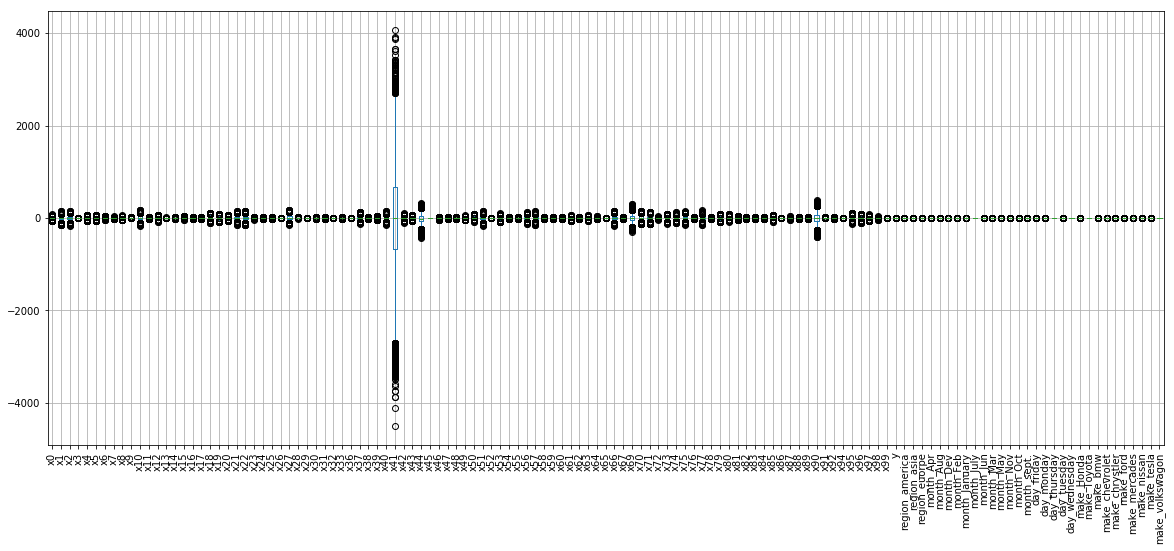

In [44]:
#what would EDA be without some plots
#im cutting out some of the exploration because i gave a goal and i dont think they relate
#like looking at the makes of cars and seeing what makes (like Toyota) are prominent
#interesting data, but for this analysis, probably not useful

import matplotlib.pyplot as plt

%matplotlib inline
#this needs to be big with so many features
plt.rcParams['figure.figsize'] = [20, 8]

df3.boxplot()
plt.xticks(rotation=90)
plt.show()

In [45]:
#create correlation matrix to look for multicollinearity or other problems
corr = df3.corr()
corr.style.background_gradient().set_precision(2)

Looking at the plot above, I see that x41, the $ amount feature, has high variance relative to the other features. That's good to note, but I've chosen models that don't require similar variance between features, so it shouldn't affect the results. They also don't care about normal distribution of features, but surprisingly the features look pretty normal. The correlation matrix shows that the highest correlation between features is .38, which gives a variance inflation factor of 1.17, which is low enough that I don't think it will affect results. 

## Modeling

Now that the data is cleaned and one-hot encoded and I'm satisfied at how it looks, I'm going to run baseline logistic regression and Random Forest models with this data, to see the results. I'm going to do a train/test split on the train data.

I'm doing a Logistic Regression because that is one of the models I may present as a final model, and I want to see what it looks like before feature selection is performed. I want to compare that against these results. I'm doing a Random Forest because it's a model that's robust to outliers, not influenced by strong predictors, averages variance to a moderate level, and reduces bias. In short, I think it gives a great unbiased first look to compare other models against.

In [169]:
y = df3['y']
X = df3.drop(['y'], axis=1)

In [170]:
#train test split on the data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
#baseline cross validation logistic regression model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

clf = LogisticRegressionCV(cv=10, refit=True, random_state=42)
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_test)
auc = roc_auc_score(y_test, train_predictions)
print(auc)

0.7958985320273766


In [23]:
#baseline random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
score = clf.predict(X_test)
auc = roc_auc_score(y_test, score)
print(auc)

0.6794844444515423


Baseline logistic regression comes in at .796 ROC_AUC, and Random Forest actually performs worse at .68. Good places to start, and some room to improve.

With my baselines established, now I can turn to feature importance.

In [155]:
#need to standardize first
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

[[ 0.02136313 -1.29996363 -1.99274693 ... -0.09115107 -0.24524389
  -0.67300233]
 [ 0.05786758  0.97579056  1.4692509  ... -0.09115107 -0.24524389
  -0.67300233]
 [-2.4387276   0.4277774   1.15173396 ... -0.09115107 -0.24524389
  -0.67300233]
 ...
 [ 1.23420883  3.10058486 -0.87878432 ... -0.09115107 -0.24524389
  -0.67300233]
 [-0.72754951 -0.192651   -0.93462571 ... -0.09115107 -0.24524389
  -0.67300233]
 [-0.73515504 -1.38346011 -1.36067044 ... -0.09115107 -0.24524389
  -0.67300233]]


In [156]:
#model with scaled features

clf = LogisticRegressionCV(cv=10, refit=True, random_state=42)
clf.fit(X_train_scaled, y_train)
train_predictions = clf.predict(X_test)
auc = roc_auc_score(y_test, train_predictions)
print(auc)

0.6392424694504709


In [157]:
#coefficients / feature weights
import numpy as np

#multiplying times 100 here so i can see the big ones more easily, it's a lot of decimals
coefficients = pd.concat([pd.DataFrame(df3.columns),pd.DataFrame(np.transpose(clf.coef_*100))], axis = 1)
print(coefficients)

                   0           0
0    x0               3.519316  
1    x1               29.909723 
2    x2               31.347328 
3    x3              -23.451139 
4    x4               12.788356 
5    x5              -12.659709 
6    x6              -0.341805  
7    x7              -0.288967  
8    x8              -26.800260 
9    x9              -0.019807  
10   x10             -61.201189 
11   x11             -0.776971  
12   x12             -72.341864 
13   x13              0.081879  
14   x14             -2.403956  
15   x15             -0.079440  
16   x16              0.618534  
17   x17              1.663105  
18   x18              3.377316  
19   x19              26.273528 
20   x20             -35.460712 
21   x21             -31.834409 
22   x22              3.616999  
23   x23              0.776079  
24   x24              2.812287  
25   x25             -10.681483 
26   x26              1.408342  
27   x27              4.474116  
28   x28             -1.137587  
29   x29  

From this analysis, it looks like the important features are x1, x2, x3, x4, x5, x8, x10, x12, x19, x20, x21, x25, x33, x37, x40, x43, x44, x47, x50, x51, x53, x56, x57, x58, x63, x66, x71, x72, x73, x75, x77, x80, x83, x85, x90, x95, x96, x97, x99. I stuck with ones that had two or three digits before the decimal point. Those with 3 are more important, but there's only a few of them, so I don't think that would be a robust enough data set. But I'll give it a shot anyway.

In [164]:
#dataframe with all the big ones
df_rd = df3.filter(['x1', 'x2', 'x3', 'x4', 'x5', 'x8', 'x10', 'x12', 'x19', 'x20', 'x21', 'x25', 'x33', 'x37', 'x40',
                   'x43', 'x44', 'x47', 'x50', 'x51', 'x53', 'x56', 'x57', 'x58', 'x63', 'x66', 'x71', 'x72',
                   'x73', 'x75', 'x77', 'x80', 'x83', 'x85', 'x90', 'x95', 'x96', 'x97', 'x99', 'y'], axis=1)
df_rd.head(2)

x1         x2        x3        x4         x5         x8        x10  \
0  74.425320  67.627745 -3.095111 -6.822327  19.048071 -22.699791  1.148618    
1  24.320711 -48.205182  1.430339 -6.552206  4.263074   1.245095  -75.745489   

         x12        x19        x20        x21       x25       x33        x37  \
0 -3.896558   1.159306  -27.961682  11.829013  3.271091 -7.350110 -10.839200   
1  11.744015  17.559436  9.841718  -12.457077  7.119592  2.620869  57.917006   

        x40       x43         x44       x47        x50        x51        x53  \
0  4.550518  0.890008 -104.388382  0.453917  35.782510 -22.567429  0.871391    
1 -9.476135 -6.068047 -65.535823  -0.822274 -5.301997   6.334988  -26.899104   

         x56        x57       x58       x63        x66        x71       x72  \
0  34.030184  56.125748  2.078396  4.036426  59.935463  8.616496   9.529082   
1 -49.979634  75.093515 -2.696257 -4.809269 -42.651072 -25.515410 -3.703719   

         x73        x75        x77        x80       x83       x85         x90  \
0 -18.001886  40.617107 -50.663141 -46.690744  1.885149  0.556071 -155.442237   
1  16.169398 -49.303165 -17.648950 -20.116032 -0.333381  5.047461 -73.365593    

         x95        x96        x97       x99  y  
0  16.202557  26.238591 -2.125570   1.237667  0  
1  29.674259 -15.141647 -36.030599  1.952183  1

In [165]:
#dataframe with 3 digits
df_rd2 = df3.filter(['x97', 'x58', 'x44', 'y'], axis=1)
df_rd2.head(2)

x97       x58         x44  y
0 -2.125570   2.078396 -104.388382  0
1 -36.030599 -2.696257 -65.535823   1

In [166]:
#linear regression with reduced datasets
#1 all

y2 = df_rd['y']
X2 = df_rd.drop(['y'], axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

clf = LogisticRegressionCV(cv=10, refit=True, random_state=42)
clf.fit(X_train2, y_train2)
train_predictions = clf.predict(X_test2)
auc = roc_auc_score(y_test2, train_predictions)
print(auc)

0.7892417641081549


In [167]:
#linear regression with reduced datasets
#2 big ones

y3 = df_rd2['y']
X3 = df_rd2.drop(['y'], axis=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

clf = LogisticRegressionCV(cv=10, refit=True, random_state=42)
clf.fit(X_train3, y_train3)
train_predictions = clf.predict(X_test3)
auc = roc_auc_score(y_test3, train_predictions)
print(auc)

0.5257225921498683


So the reduced data sets from feature importance didn't pan out. To figure out why would take more time than I have, so I'm moving on to the next model.

In [231]:
#run xgboost gridsearchCV to get best xgboost hyperparameters
#goal is to use xgboost, so i need to check parameters
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#play around with these manually or search them all (very time intensive)
params={
    'max_depth': [4], #[2,3,4,5,6,7,8,9],
    'subsample': [1.0], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [.8], #[0.5,0.6,0.7,0.8],
    'n_estimators': [3000], #[1000,2000,3000],
    'reg_alpha': [.02] #[0.01, 0.02, 0.03, 0.04]
}

xgb_clf = XGBClassifier()
rs = GridSearchCV(xgb_clf,
                  params,
                  cv=5,
                  scoring="log_loss",
                  n_jobs=1,
                  verbose=2)
rs.fit(X_train, y_train)
best_est = rs.best_estimator_
print(best_est)

validation = best_est.predict_proba(X_train)

/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4 
[CV]  n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4, total= 6.1min

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.2min remaining:    0.0s
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



[CV] n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4 
[CV]  n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4, total= 6.1min

/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



[CV] n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4 
[CV]  n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4, total= 6.1min

/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



[CV] n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4 
[CV]  n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4, total= 6.2min

/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



[CV] n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4 
[CV]  n_estimators=3000, subsample=1.0, reg_alpha=0.02, colsample_bytree=0.8, max_depth=4, total= 5.9min

/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 30.7min finished



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.02, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)


In [188]:
probs = best_est.predict_proba(X_test)
predictions = np.round(probs[:,1])
print(roc_auc_score(y_test, predictions))

0.9554810554369783


.955 accuracy on the training set with the XGBoost model is really good, so I'll do it to the State Farm provided test set and output a file for my first set of results.

In [211]:
farm_test = pd.read_csv('/Users/Ryan/Desktop/Programming/State Farm/exercise_02_test.csv')

In [212]:
#need to clean x41 and x45
farm_test.loc[:,'x41'] = farm_test.loc[:,'x41'].str.replace('$','').astype(float)
farm_test.loc[:,'x45'] = farm_test.loc[:,'x45'].str.rstrip('%').astype(float) / 100.0

In [213]:
#convert days again
farm_test.x35.replace(['wed','thur','fri','thurday'],['wednesday','thursday','friday','thursday'], inplace=True)

In [214]:
#and one-hot encode
X = farm_test[['x34','x35','x68','x93']]

#make the variables categorical
X['x34'] = pd.Categorical(X['x34'])
X['x35'] = pd.Categorical(X['x35'])
X['x68'] = pd.Categorical(X['x68'])
X['x93'] = pd.Categorical(X['x93'])

#one hot encode them
#im organizing it this way to make sure i get them all correctly
#x41 and x45 dont need this
dfDummies1 = pd.get_dummies(X['x93'], prefix = 'region')
dfDummies2 = pd.get_dummies(X['x68'], prefix = 'month')
dfDummies3 = pd.get_dummies(X['x35'], prefix = 'day')
dfDummies4 = pd.get_dummies(X['x34'], prefix = 'make')

/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [215]:
#add the columns to the dataframe 
farm_test = pd.concat([farm_test, dfDummies1], axis=1)
farm_test = pd.concat([farm_test, dfDummies2], axis=1)
farm_test = pd.concat([farm_test, dfDummies3], axis=1)
farm_test = pd.concat([farm_test, dfDummies4], axis=1)

In [216]:
#need to drop the columns i didn't use in my model
farm_test.drop(['x34','x35','x68','x93'], axis=1, inplace=True)

In [218]:
probs2 = best_est.predict_proba(farm_test)

In [221]:
np.savetxt("/Users/Ryan/Desktop/Programming/State Farm/results1.csv", probs2[:,1], delimiter=",")

I was going to use a Linear Regression as my second model, as I noted above, but since I couldn't really improve on the original baseline results, I decided to do a convolutional neural network to both get better results than baseline and demonstrate deep learning skills.

In [223]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Nadam

model = Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Dense(200, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Dense(50, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Dense(300, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(100, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform')) 
model.add(Activation('sigmoid'))

#keras documentation says use default values
nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=nadam)

model.fit(X_train, y_train, epochs=5, batch_size=10)
print(roc_auc_score(y_test, model.predict(X_test)))

Epoch 1/5
27427/27427 [==============================] - 14s 498us/step - loss: 0.2720 - acc: 0.8999
Epoch 2/5
27427/27427 [==============================] - 13s 490us/step - loss: 0.1909 - acc: 0.9447
Epoch 3/5
27427/27427 [==============================] - 14s 499us/step - loss: 0.2028 - acc: 0.9409
Epoch 4/5
27427/27427 [==============================] - 13s 491us/step - loss: 0.1366 - acc: 0.9682
Epoch 5/5
27427/27427 [==============================] - 13s 474us/step - loss: 0.1206 - acc: 0.9704
0.9867524957362279


The CNN has a .986 ROC_AUC score, which is even better thwn XGBoost, so I'm glad I did this. Both are great improvements over the baseline models.

In [227]:
#since farm_test loaded from the test data set i was given is already loaded and cleaned, 
#I'll just use it here so I don't have to clean it up again

probs3 = model.predict(farm_test)

In [230]:
np.savetxt("/Users/Ryan/Desktop/Programming/State Farm/results2.csv", probs3, delimiter=",")

And with that, I have two models to present. The writeup is at the top. I hope you enjoyed my work, as I'd love to come work at State Farm. One of my professors previously worked as a Data Scientist with you, and I applied for this position because he recommended the company and job so highly.

If you're reading this far, you might have noticed some shortcomings in my work, and I have too, so I'll address a couple here:

More EDA: I briefly mentioned this above in code comments, but knowing what the features are and examining them would have been useful. Like does it matter that there are more Volkswagens in the make feature than other cars? Does this affect the models? Stuff like that. I could have explored that with a little more data, or added it in somehow with feature engineering, as below.

Feature engineering: One of my professors in my last semester of school brought up feature engineering to create new features out of the data that exists to help improve the models. I gave this a go, but couldn't get anywhere with the time I had. One of note was the percentage variable, which I feel when multipled by some of the others may have been useful. I also tried to group by make of car and region and maybe use that in some way, but I didn't get anywhere. That's added to my list of things I need to learn now that I've graduated. I'm surprised it hadn't come up before.

ROC AUC Curves: Since you asked for ROC AUC analysis, it would have been fitting to show some ROC AUC curves. I've seen this before, but never done it, and didn't have the time to figure it out. Another thing to add to the list.

Missing values: I've done a lot of class work on imputation and missing values, and didn't use it here. With such high ROC AUC scores, I don't think it would've helped much. Examining the changes in statistics (mean/Median, etc) showed very little change on most variables, but I don't want you to think I can't do it. 